<a href="https://colab.research.google.com/github/anbubus/deeplearning_ocean/blob/main/firts_test_deeplearning_ocean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow
# Keras
# Redes Neurais
print("Hello World")
num = 20
print(num)
lista = [12, 12, 23]
print(lista, type(lista))

Hello World
20
[12, 12, 23] <class 'list'>


In [2]:
from tensorflow import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST 
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [7]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_Treino -> 60k imagens, 28x28 pixels
# Y_Treino -> 60k labels, contendo o número que está desenhado na imagem

# X_Teste -> 10k imagens, 28x28 pixels
# Y_Teste -> 10k labels, contendo o número que está desenhado na imagem


In [4]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 de treino representa?", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa? [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0  

A imagem representa: 5


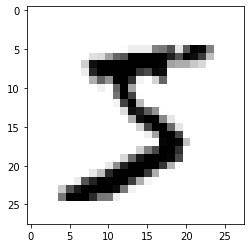

In [14]:
import matplotlib.pyplot as plt

indice = 0

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [15]:
#Achatando a matrix de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [16]:
print("Quantidade de items em x_trieno[0]: ", len(x_treino[0]))
print(x_treino[0])

Quantidade de items em x_trieno[0]:  784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

In [ ]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""


In [ ]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255